<a href="https://colab.research.google.com/github/Akiyoshi-Yagi/deepLearning/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#畳み込みの実装

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
print(digits.data.shape)


(1797, 64)


In [2]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [0]:
image = digits.data[0].reshape(8,8)

In [4]:
image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

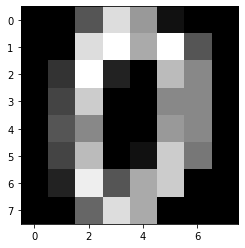

In [6]:
plt.imshow(image, cmap="gray")
plt.show()

In [0]:
def im2col(img, flt_h, flt_w, out_h, out_w):  # 入力画像、フィルタの高さ、幅、出力画像の高さ、幅

    cols = np.zeros((flt_h*flt_w, out_h*out_w)) # 生成される行列のサイズ

    for h in range(out_h):
        h_lim = h + flt_h  # h:フィルタがかかる領域の上端、h_lim:フィルタがかかる領域の下端
        for w in range(out_w):
            w_lim = w + flt_w  # w:フィルタがかかる領域の左端、w_lim:フィルタがかかる領域の右端
            cols[:, h*out_w+w] = img[h:h_lim, w:w_lim].reshape(-1)

    return cols

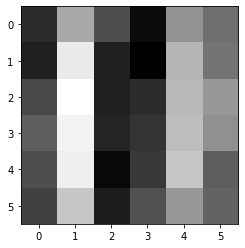

In [8]:
flt = np.array([[-1, 1, -1,],
                [-1, 1, -1,],
                [-1, 1, -1,]])
flt_h, flt_w = flt.shape
flt = flt.reshape(-1)

img_h, img_w = image.shape  # 入力画像の高さ、幅
out_h = img_h - flt_h + 1  # 出力画像の高さ（パディング無し、ストライド1）
out_w = img_w - flt_w + 1  # 出力画像の幅（パディング無し、ストライド1）

cols = im2col(image, flt_h, flt_w, out_h, out_w)

image_out = np.dot(flt, cols)  # 畳み込み
image_out = image_out.reshape(out_h, out_w)
plt.imshow(image_out, cmap="gray")
plt.show() 

#プーリングの実装


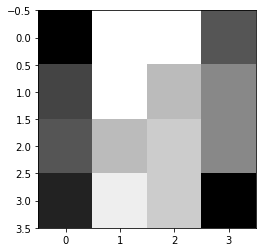

In [9]:
def im2col(img, flt_h, flt_w, out_h, out_w, stride):  # 入力画像、プーリング領域の高さ、幅、出力画像の高さ、幅、ストライド

    cols = np.zeros((flt_h*flt_w, out_h*out_w)) # 生成される行列のサイズ

    for h in range(out_h):
        h_lim = stride*h + flt_h  # h:プーリング領域の上端、h_lim:プーリング領域の下端
        for w in range(out_w):
            w_lim = stride*w + flt_w  # w:プーリング領域の左端、w_lim:プーリング領域の右端
            cols[:, h*out_w+w] = img[stride*h:h_lim, stride*w:w_lim].reshape(-1)

    return cols

    img_h, img_w = image.shape  # 入力画像の高さ、幅
pool = 2  # プーリング領域のサイズ

out_h = img_h//pool  # 出力画像の高さ
out_w = img_w//pool  # 出力画像の幅

cols = im2col(image, pool, pool, out_h, out_w, pool)
image_out = np.max(cols, axis=0)  # Maxプーリング
image_out = image_out.reshape(out_h, out_w)

plt.imshow(image_out, cmap="gray")
plt.show() 

#CNNの実装

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10

(x_train, t_train), (x_test, t_test) = cifar10.load_data()
print(x_train[1:].shape)

(49999, 32, 32, 3)


In [44]:
n_image = 25
rand_idx = np.random.randint(0, len(x_train), n_image)
rand_idx

array([12524, 49112, 20239, 38110, 13917,  7949, 43548, 46996, 48575,
       49799, 48048, 44883,  6963, 35375, 48359, 49367, 23146, 18745,
        4277, 18449, 39645, 14003, 36456, 11202, 41238])

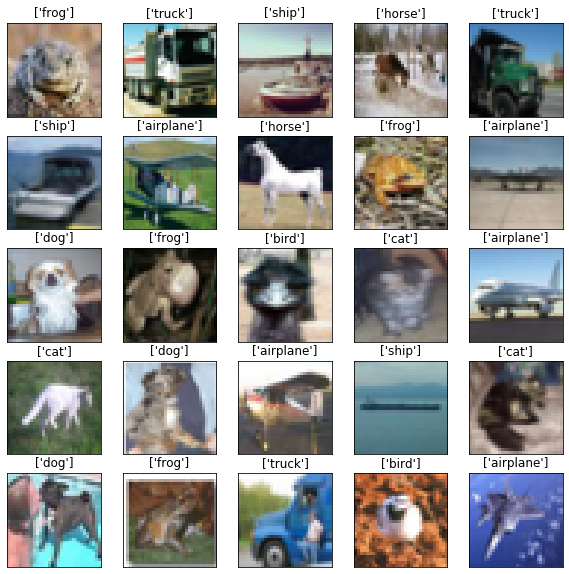

In [45]:
cifar10_labels = np.array(["airplane", "automobile", "bird", "cat", "deer",
                           "dog", "frog", "horse", "ship", "truck"])

plt.figure(figsize=(10,10))
for i in range(n_image):
  cifar_img = plt.subplot(5,5,i+1)
  plt.imshow(x_train[rand_idx[i]])
  label = cifar10_labels[t_train[rand_idx[i]]]
  plt.title(label)
  plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

plt.show()


In [0]:
batch_size = 32 
epochs = 20
n_class = 10

t_train = keras.utils.to_categorical(t_train,n_class)
t_test = keras.utils.to_categorical(t_test,n_class)


In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))  # ゼロパディング、バッチサイズ以外の画像の形状を指定
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # 一次元の配列に変換
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # ドロップアウト
model.add(Dense(n_class))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_27 (Activation)   (None, 15, 15, 64)       

In [48]:
x_train = x_train / 255  # 0から1の範囲に収める
x_test = x_test / 255

history = model.fit(x_train, t_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_test, t_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 14s 283us/step - loss: 1.5196 - acc: 0.4459 - val_loss: 1.2863 - val_acc: 0.5498
Epoch 2/20
50000/50000 [==============================] - 14s 279us/step - loss: 1.1179 - acc: 0.6046 - val_loss: 1.0343 - val_acc: 0.6431
Epoch 3/20
50000/50000 [==============================] - 14s 281us/step - loss: 0.9449 - acc: 0.6700 - val_loss: 0.8780 - val_acc: 0.6882
Epoch 4/20
50000/50000 [==============================] - 14s 282us/step - loss: 0.8409 - acc: 0.7071 - val_loss: 0.8055 - val_acc: 0.7179
Epoch 5/20
50000/50000 [==============================] - 14s 279us/step - loss: 0.7632 - acc: 0.7321 - val_loss: 0.7627 - val_acc: 0.7359
Epoch 6/20
50000/50000 [==============================] - 14s 278us/step - loss: 0.7108 - acc: 0.7515 - val_loss: 0.7884 - val_acc: 0.7311
Epoch 7/20
50000/50000 [==============================] - 14s 278us/step - loss: 0.6639 - acc: 0.7669 - val_loss: 0.

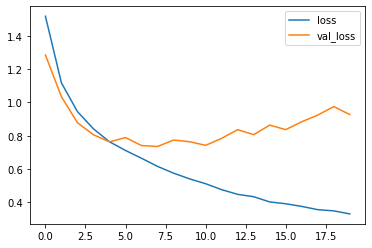

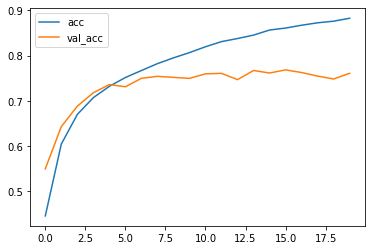

In [49]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']  # 訓練用データの誤差
train_acc = history.history['acc']  # 訓練用データの精度
val_loss = history.history['val_loss']  # 検証用データの誤差
val_acc = history.history['val_acc']  # 検証用データの精度

plt.plot(np.arange(len(train_loss)), train_loss, label='loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_acc')
plt.legend()
plt.show()

In [50]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

10000/10000 [==============================] - 1s 106us/step
0.9270567739486695 0.7608


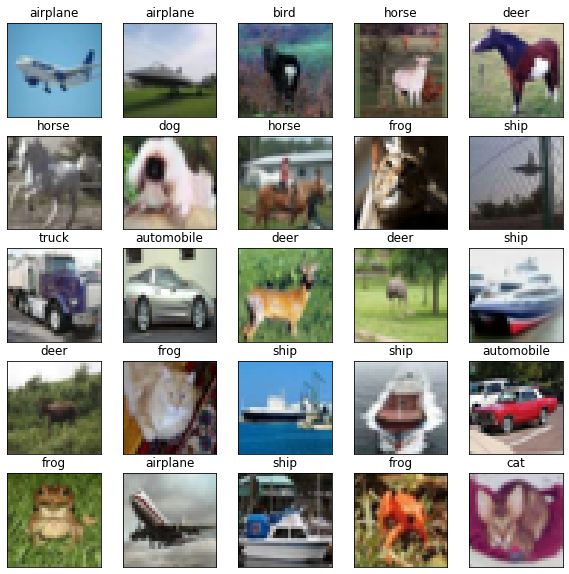

In [51]:
n_image = 25
rand_idx = np.random.randint(0, len(x_test), n_image)

y_rand = model.predict(x_test[rand_idx])
predicted_class = np.argmax(y_rand, axis=1)

plt.figure(figsize=(10, 10))  # 画像の表示サイズ
for i in range(n_image):
    cifar_img=plt.subplot(5, 5, i+1)
    plt.imshow(x_test[rand_idx[i]])
    label = cifar10_labels[predicted_class[i]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.show()

In [0]:
#精度があまり良くない場合は、反転、シフト、回転などにより、データ数を水増しする、データ拡張を行う！！